## Multi-Class Prediction of Cirrhosis Outcomes

Cirrhosis is a disease characterized by progressive damage and loss of function of the liver. In this study, a machine learning model will be developed to predict the outcomes of cirrhosis patients. The aim is to better understand and predict the survival status of patients with different treatment and intervention options. Various data preprocessing steps, model training and evaluation methods will be used in this process.

**Information about columns**
* id: The patient's unique ID. A unique identifier for each patient.

* N_Days: The number of days the patient was admitted to the hospital or monitored. This indicates the duration of treatment or how long the follow-up lasted.

* Drug: The type of medication or treatment the patient is taking. This column may include the names or types of medications being treated.

* Age: The patient's age.

* Sex: The patient's gender

* Ascites: The presence of ascites. It indicates whether there is fluid accumulation in the abdominal cavity. It is a complication that is usually seen in patients with liver disease.

* Hepatomegaly: The condition of an enlarged liver. It indicates whether there is abnormal enlargement of the liver.

* Spiders: The presence of small, dilated blood vessels called spider nevi. This condition is common in liver disease.

* Edema: Indicates whether there is edema, that is, abnormal fluid accumulation in the body. It is usually seen in liver disease.

* Bilirubin: Bilirubin level. Bilirubin is a substance formed by the breakdown of red blood cells and is processed by the liver. High bilirubin levels can be an indicator of liver problems such as jaundice.

Cholesterol: The patient's cholesterol level. High or low cholesterol can provide information about the patient's general health.

* Albumin: The level of albumin in the blood. This protein, produced by the liver, plays an important role in balancing body fluids.

* Copper: The patient's copper level in the blood or urine. It can be associated with liver diseases, especially Wilson's disease.

* Alk_Phos: Alkaline phosphatase level. This enzyme is found in the liver and bone tissue. High levels can indicate liver or bone diseases.

* SGOT: Aspartate aminotransferase (AST) level. This enzyme provides information about the function of the liver. High levels can indicate liver damage.

* Tryglicerides: The level of triglycerides in the patient's blood. Triglycerides are a type of fat in the blood, and high levels can increase the risk of heart disease.

* Platelets: Platelet count. Platelets play an important role in blood clotting, and low levels are common in liver disease

* Prothrombin: Prothrombin time or level. Indicates the time it takes for blood to clot. This time may be prolonged in liver disease.

* Stage: The stage of disease or liver damage. Usually indicates the severity or progression of the disease.

* Status: The patient's general condition or the current state of the disease.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoXTM7iGNcQraA__rafVQbzbkcS3ogDn6dFA&s)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [54]:
train=pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
#Reading the file.

## EDA

In [4]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [5]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [6]:
train.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [7]:
test.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [8]:
train.shape, test.shape

((7905, 20), (5271, 19))

In [55]:
df=pd.concat([train,test])
#Merging the files.

In [10]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [11]:
df.shape

(13176, 20)

In [12]:
df.isnull().sum()

id                  0
N_Days              0
Drug                0
Age                 0
Sex                 0
Ascites             0
Hepatomegaly        0
Spiders             0
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
Status           5271
dtype: int64

In [13]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,6587.500000,2033.583030,18422.996281,2.596847,351.331815,3.544221,84.222416,1814.540225,114.197725,115.318534,264.746812,10.630823,3.034305
std,3803.727908,1091.249998,3642.209391,3.828640,197.413677,0.349706,76.558760,1916.383653,48.861248,52.557379,87.511668,0.786116,0.862303
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,3293.750000,1234.000000,15612.000000,0.700000,248.000000,3.350000,39.000000,824.000000,75.950000,84.000000,210.000000,10.000000,2.000000
50%,6587.500000,1874.000000,18719.000000,1.100000,299.000000,3.580000,63.000000,1166.000000,106.950000,104.000000,264.000000,10.600000,3.000000
75%,9881.250000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1840.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,13175.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [14]:
df.corr(numeric_only=True)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,1.000000,-0.002568,0.012846,0.002137,-0.000457,-0.016544,0.003567,0.000115,-0.004476,-0.002992,-0.008911,0.003950,-0.002301
N_Days,-0.002568,1.000000,-0.107653,-0.337271,-0.141622,0.256216,-0.283642,-0.021840,-0.228127,-0.177415,0.137721,-0.153783,-0.198858
Age,0.012846,-0.107653,1.000000,0.093448,-0.057229,-0.113216,0.093641,0.023016,-0.016340,0.018177,-0.101632,0.148673,0.123839
Bilirubin,0.002137,-0.337271,0.093448,1.000000,0.307361,-0.296047,0.444317,0.133350,0.361997,0.317559,-0.082972,0.305112,0.188007
Cholesterol,-0.000457,-0.141622,-0.057229,0.307361,1.000000,-0.094129,0.169216,0.125099,0.335114,0.276512,0.093361,0.029676,0.034767
Albumin,-0.016544,0.256216,-0.113216,-0.296047,-0.094129,1.000000,-0.231355,-0.094491,-0.206353,-0.113097,0.138402,-0.214748,-0.226818
Copper,0.003567,-0.283642,0.093641,0.444317,0.169216,-0.231355,1.000000,0.130324,0.327839,0.280991,-0.104843,0.250738,0.193192
Alk_Phos,0.000115,-0.021840,0.023016,0.133350,0.125099,-0.094491,0.130324,1.000000,0.132010,0.100097,0.043605,0.086563,0.067101
SGOT,-0.004476,-0.228127,-0.016340,0.361997,0.335114,-0.206353,0.327839,0.132010,1.000000,0.147396,-0.035155,0.139418,0.114360
Tryglicerides,-0.002992,-0.177415,0.018177,0.317559,0.276512,-0.113097,0.280991,0.100097,0.147396,1.000000,0.019131,0.071196,0.075499


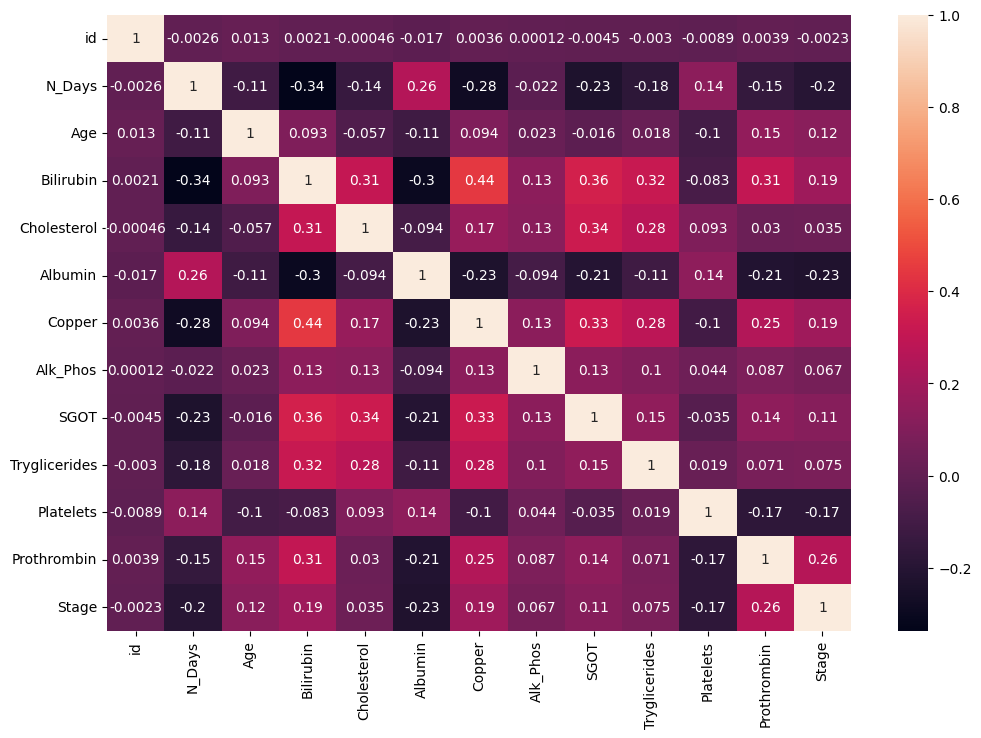

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True);

## Data Visualization

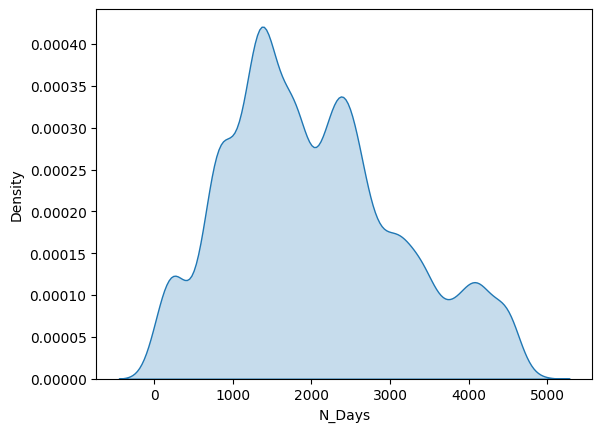

In [16]:
sns.kdeplot(x=df['N_Days'], fill=True);

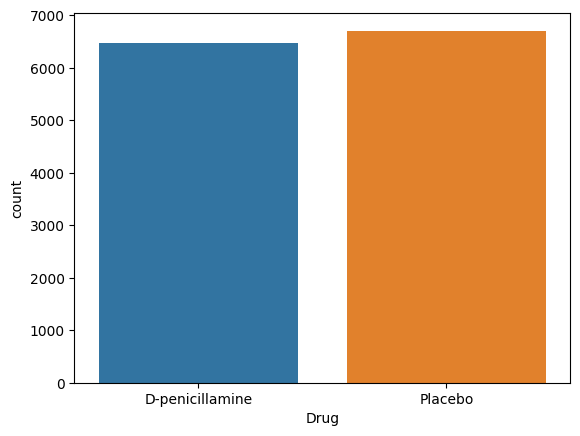

In [17]:
sns.countplot(x=df['Drug']);

In [23]:
df['Age']=df['Age'] / 365
df['Age']=df['Age'].astype(int)
#Age column was given in days. We divided it by 365 and converted it to int. We calculated the age in years.

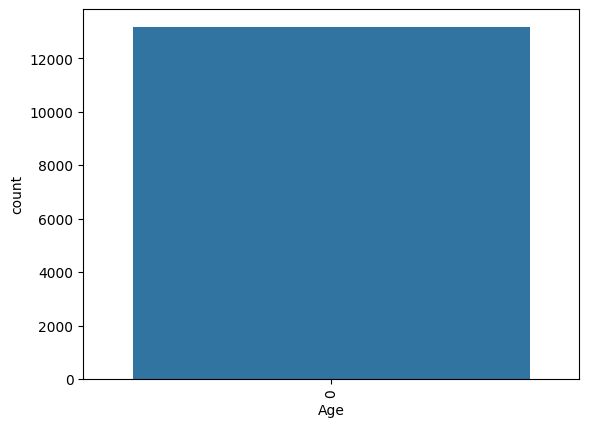

In [24]:
sns.countplot(x=df['Age'])
plt.xticks(rotation=90);

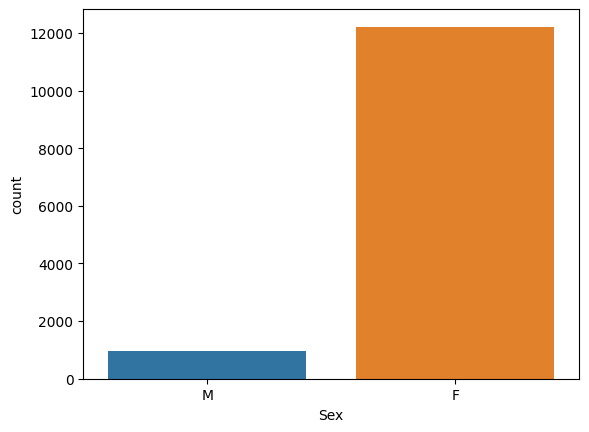

In [25]:
sns.countplot(x=df['Sex']);

In [26]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,0,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,0,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,0,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,0,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,0,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


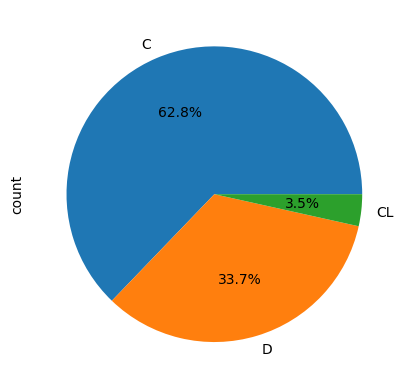

In [27]:
#sns.countplot(x=df['Status']);
df['Status'].value_counts().plot.pie(autopct='%1.1f%%');

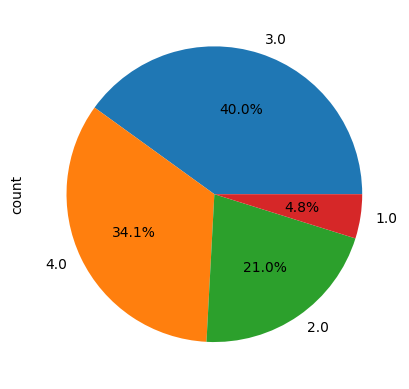

In [28]:
#sns.countplot(x=df['Stage']);
df['Stage'].value_counts().plot.pie(autopct='%1.1f%%');

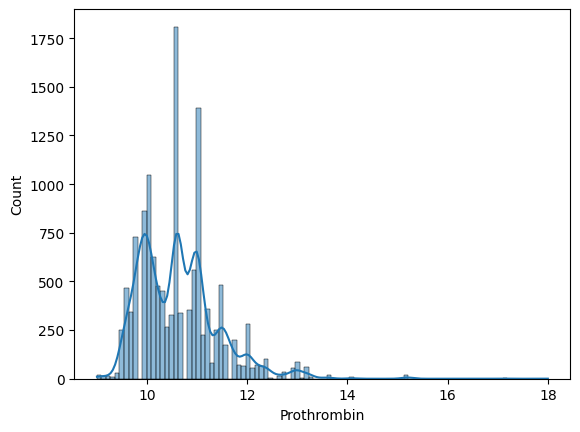

In [29]:
sns.histplot(x=df['Prothrombin'], kde=True, bins=100);

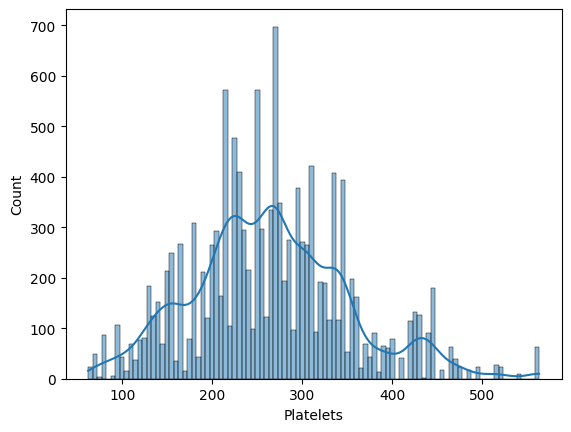

In [30]:
sns.histplot(x=df['Platelets'], kde=True, bins=100);

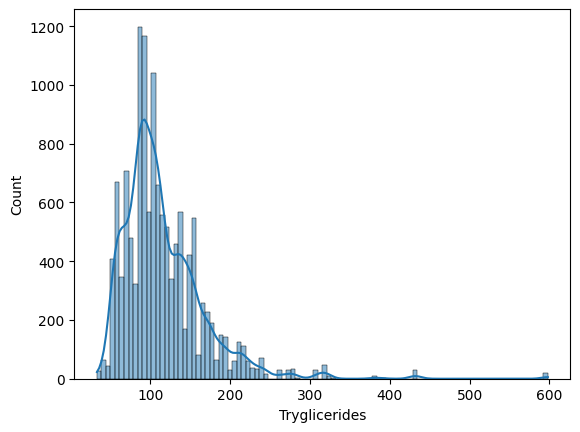

In [31]:
sns.histplot(x=df['Tryglicerides'], kde=True, bins=100);

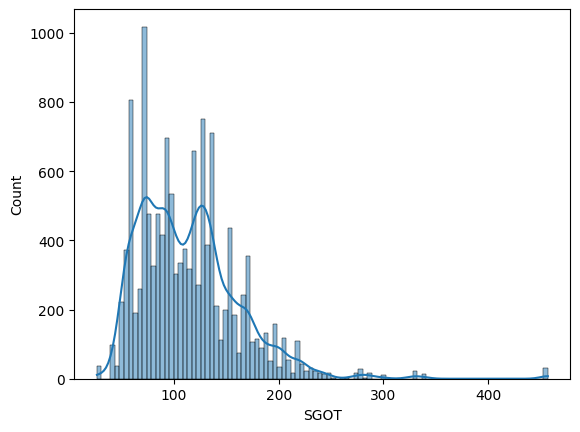

In [32]:
sns.histplot(x=df['SGOT'], kde=True, bins=100);

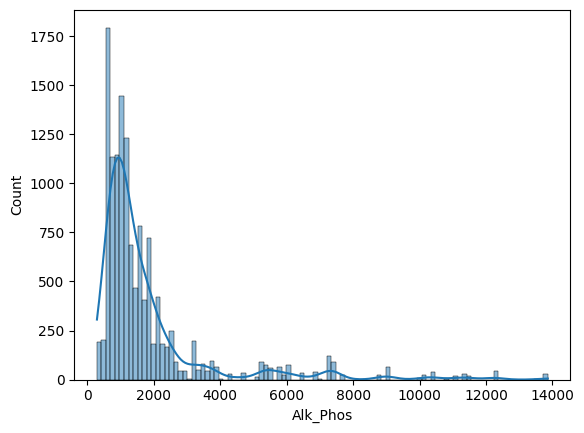

In [33]:
sns.histplot(x=df['Alk_Phos'], kde=True, bins=100);

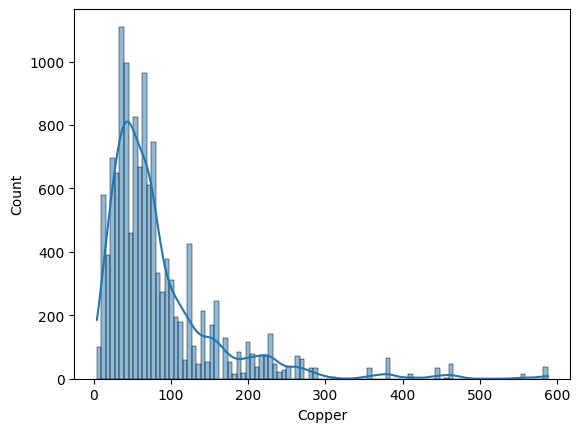

In [34]:
sns.histplot(x=df['Copper'], kde=True, bins=100);

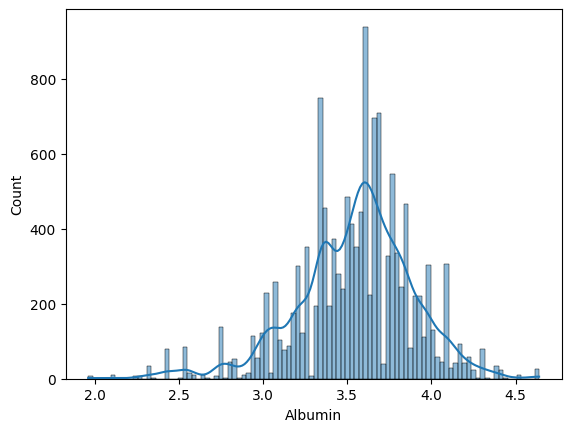

In [35]:
sns.histplot(x=df['Albumin'], kde=True, bins=100);

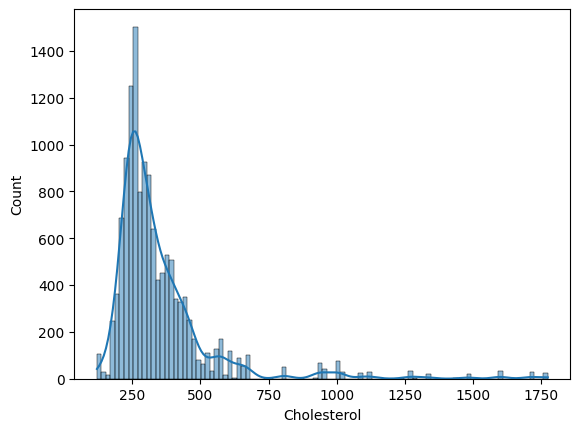

In [36]:
sns.histplot(x=df['Cholesterol'], kde=True, bins=100);

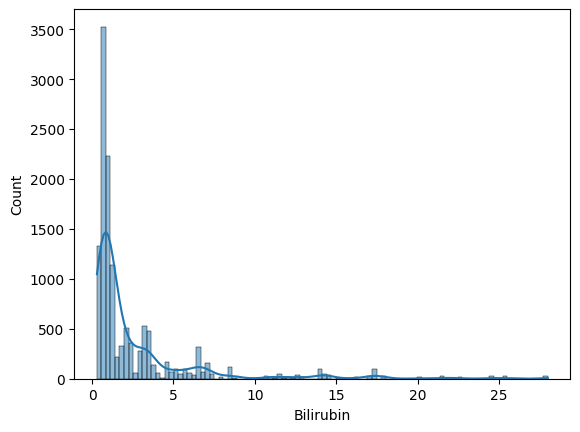

In [37]:
sns.histplot(x=df['Bilirubin'], kde=True, bins=100);

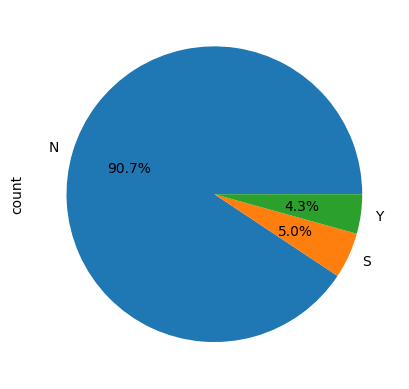

In [38]:
#sns.countplot(x=df['Edema']);
df['Edema'].value_counts().plot.pie(autopct='%1.1f%%');

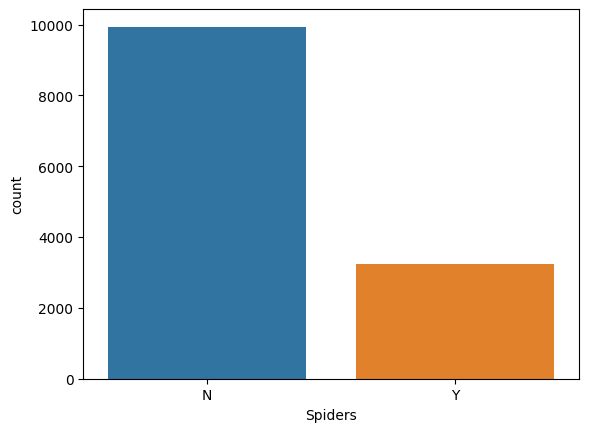

In [39]:
sns.countplot(x=df['Spiders']);

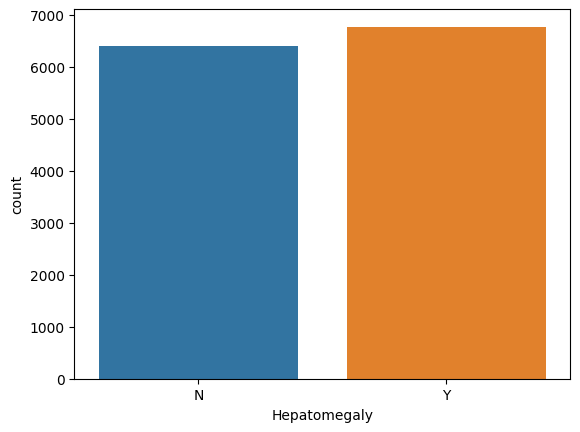

In [40]:
sns.countplot(x=df['Hepatomegaly']);

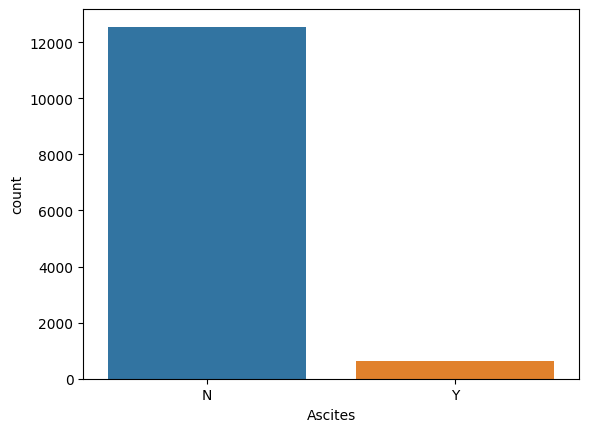

In [41]:
sns.countplot(x=df['Ascites']);

## Modelling

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss

In [52]:
train.shape

(7905, 29)

In [56]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [57]:
train=df[:7905]
test=df[7905:]

In [58]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [59]:
x=train.drop(['Status'],axis=1)
y=train[['Status']]

In [60]:
x=pd.get_dummies(x)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [62]:
g=GaussianNB()
g.fit(x_train,y_train)
gtahmin=g.predict(x_test)
accuracy_score(gtahmin,y_test)

0.7337128399746996

In [81]:
g = GaussianNB()
g.fit(x_train, y_train)

gtahmin_proba = g.predict_proba(x_test)

# Logaritmik kaybı hesaplama
loss = log_loss(y_test, gtahmin_proba)
print("Multiclass Logarithmic Loss:", loss)

Multiclass Logarithmic Loss: 2.1158473296403604


In [63]:
confusion_matrix(gtahmin,y_test)

array([[878,  40, 245],
       [ 28,   6,  42],
       [ 60,   6, 276]])

In [64]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

           C       0.91      0.75      0.82      1163
          CL       0.12      0.08      0.09        76
           D       0.49      0.81      0.61       342

    accuracy                           0.73      1581
   macro avg       0.50      0.55      0.51      1581
weighted avg       0.78      0.73      0.74      1581



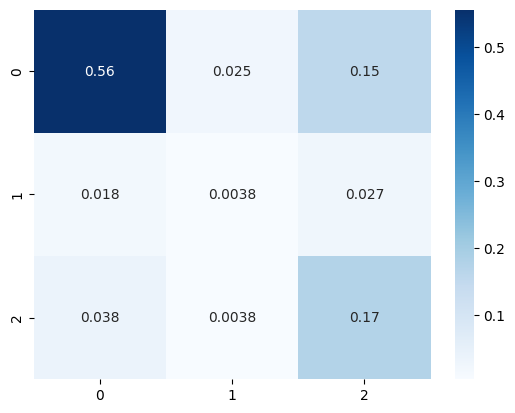

In [65]:
cm = confusion_matrix(gtahmin, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues');

In [66]:
b=BernoulliNB()
b.fit(x_train,y_train)
btahmin=b.predict(x_test)
accuracy_score(btahmin,y_test)

0.7109424414927261

In [67]:
confusion_matrix(btahmin,y_test)

array([[847,  40, 286],
       [  0,   0,   0],
       [119,  12, 277]])

In [68]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

           C       0.88      0.72      0.79      1173
          CL       0.00      0.00      0.00         0
           D       0.49      0.68      0.57       408

    accuracy                           0.71      1581
   macro avg       0.46      0.47      0.45      1581
weighted avg       0.78      0.71      0.73      1581



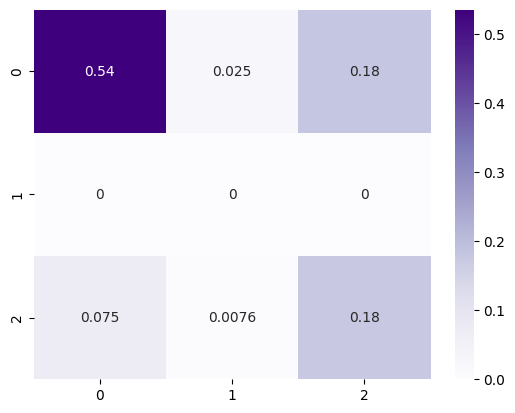

In [69]:
cm = confusion_matrix(btahmin, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples');

In [94]:
#K-Fold Cross Validation (with Random Forest Classifier)
x=train.drop('Status', axis=1)
y=train[['Status']]
x=pd.get_dummies(x, drop_first=True)

model=RandomForestClassifier()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.8285895  0.8172043  0.82036686 0.82542694 0.82163188]
Mean Accuracy: 0.8226438962681847


In [95]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):

    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,  b,  knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB', 'K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []


    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)

    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1


    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [96]:
algo_test(x, y)

,Accuracy,Precision,Recall,F1-score
Gradient Boosting,0.833017,0.826183,0.833017,0.823948
Random Forest,0.831120,0.827511,0.831120,0.820792
AdaBoost,0.805187,0.794644,0.805187,0.795719
Logistic Regression,0.766603,0.742363,0.766603,0.745073
Decision Tree,0.740038,0.747238,0.740038,0.743080
K-Nearest Neighbors,0.734978,0.727042,0.734978,0.721404
SVM,0.718533,0.703111,0.718533,0.686010
BernoulliNB,0.710942,0.683044,0.710942,0.686868
MLP Classifier,0.655914,0.684265,0.655914,0.569496


## Test Data Prediction

In [70]:
test1=test.drop('Status',axis=1)

In [71]:
test1

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [72]:
test1=pd.get_dummies(test1)

In [73]:
g.fit(x,y)
pred=g.predict(test1)

In [74]:
pred1=pd.DataFrame()

In [75]:
pred1['id']=test1['id']

In [76]:
pred1['Status']=pred

In [77]:
pred1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5271 entries, 0 to 5270
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5271 non-null   int64 
 1   Status  5271 non-null   object
dtypes: int64(1), object(1)
memory usage: 123.5+ KB


In [78]:
pred1.to_csv('cirrhosis.csv', index=False)

## Summary

In this project, training and test data sets were combined and turned into a whole for data analysis and model training. Graphs were created to understand the characteristics of the data set. This was important for visually examining the distributions and relationships in the data. The combined data set was divided into two to be used for training and testing the model. Generally, 80% training and 20% test ratio was used. One-hot encoding was applied for the class labels, which were the target variables. This allowed categorical data to be processed in numerical format. Training was done on the data using various classification models. The model was optimized to increase its predictive power. Several metrics were used to evaluate the performance of the model. Confusion Matrix: Used to visualize the predictive performance of the model. Classification Report: Metrics such as accuracy, recall and F1 score were calculated. K-Fold Cross Validation: Used to evaluate the overall performance of the model more reliably. Multiclass Logarithmic Loss: Calculated to measure the accuracy of the model's predictions. The trained model made predictions on the test data set. These predictions were used to evaluate the performance of the model on real-world data. The prediction results were saved in a CSV file format.

This study covers the development of a model for predicting outcomes in patients with cirrhosis. The analyses and model evaluations provide important information that can contribute to the decision-making processes in the treatment of patients with cirrhosis. Such models can guide future research and clinical applications.